# kmeans_CNN_clustering
- In [CNN_transfer_learning](./CNN_transfer_learning), we used a pre-trained convolutional neural network to generate a new feature set to better represent the galaxy images. These features were then compressed by a principal component analysis.
- Here, we take the output from the PCA to cluster together galaxy images using the K-means clustering algorithm.
- We select 10 clusters as a baseline, before exploring more complex clustering algorithms. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans
import cluster_evaluate

### Loading set of features 
- Also weights in case we want to manipulate feature space to rank pca components that best describe the variance in the data
- Several feature representations were generated, so selecting combination of output features from CNN and the number of features these were compressed to by the pca.

In [17]:
pca_feat = 20
cnn_feat = 128

features = np.load('./features/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) + '_features.npy')
weights = np.load('./features/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) + '_weights.npy')

plot_path = './cluster_plots/kmeans/CNN-' + str(cnn_feat) + '_PCA-' + str(pca_feat) +'/'
plot_path

'./cluster_plots/kmeans/CNN-128_PCA-20/'

### Creating K-means cluster object and fitting to the set of features output from the pca
- Generating count plot of cluster sizes

In [5]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(features)

KMeans(n_clusters=10)

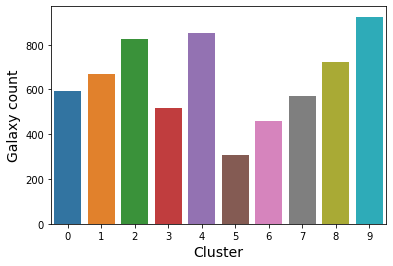

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(x=kmeans.labels_, ax=ax)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Galaxy count', fontsize=14)
plt.savefig(plot_path + 'cluster_countplot.png', format='png', 
            bbox_inches='tight', dpi=200)

### Plotting galaxies in each cluster

In [ ]:
for cluster in np.unique(kmeans.labels_):
    print('Cluster : {}'.format(cluster))
    cluster_evaluate.plot_cluster(x[kmeans.labels_ == cluster][0:10])
    plt.show()